In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [ ]:
from prophet import Prophet

In [ ]:
avocado_df = pd.read_csv('avocado.csv')

In [ ]:
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


#Exploring the Dataset

In [ ]:
avacado_df = avocado_df.sort_values("Date")
avocado_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


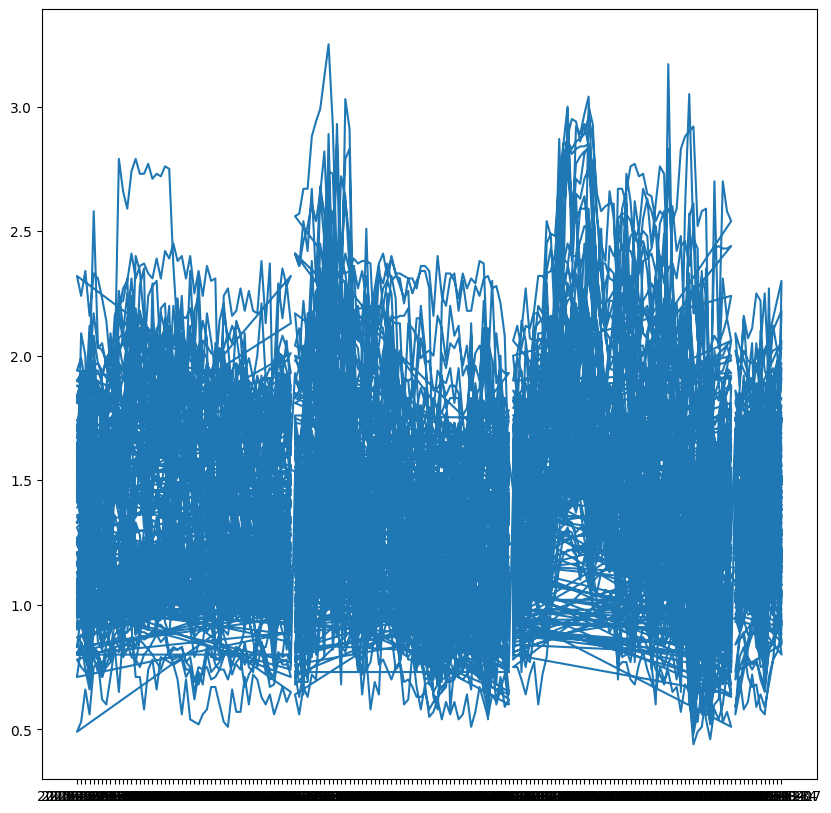

In [ ]:
plt.figure(figsize = (10, 10)) # for increasing the scale
plt.plot(avocado_df['Date'], avocado_df['AveragePrice'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'CincinnatiDayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'GrandRapids'),
  Text(15, 0, 'GreatLakes'),
  Text(16, 0, 'HarrisburgScranton'),
  Text(17, 0, 'HartfordSpringfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'LasVegas'),
  Text(22, 0, 'LosAngeles'),
  Text(23, 0, 'Louisville'),
  Text(24, 0, 'MiamiFtLauderdale'),
  Text(25, 0, 'M

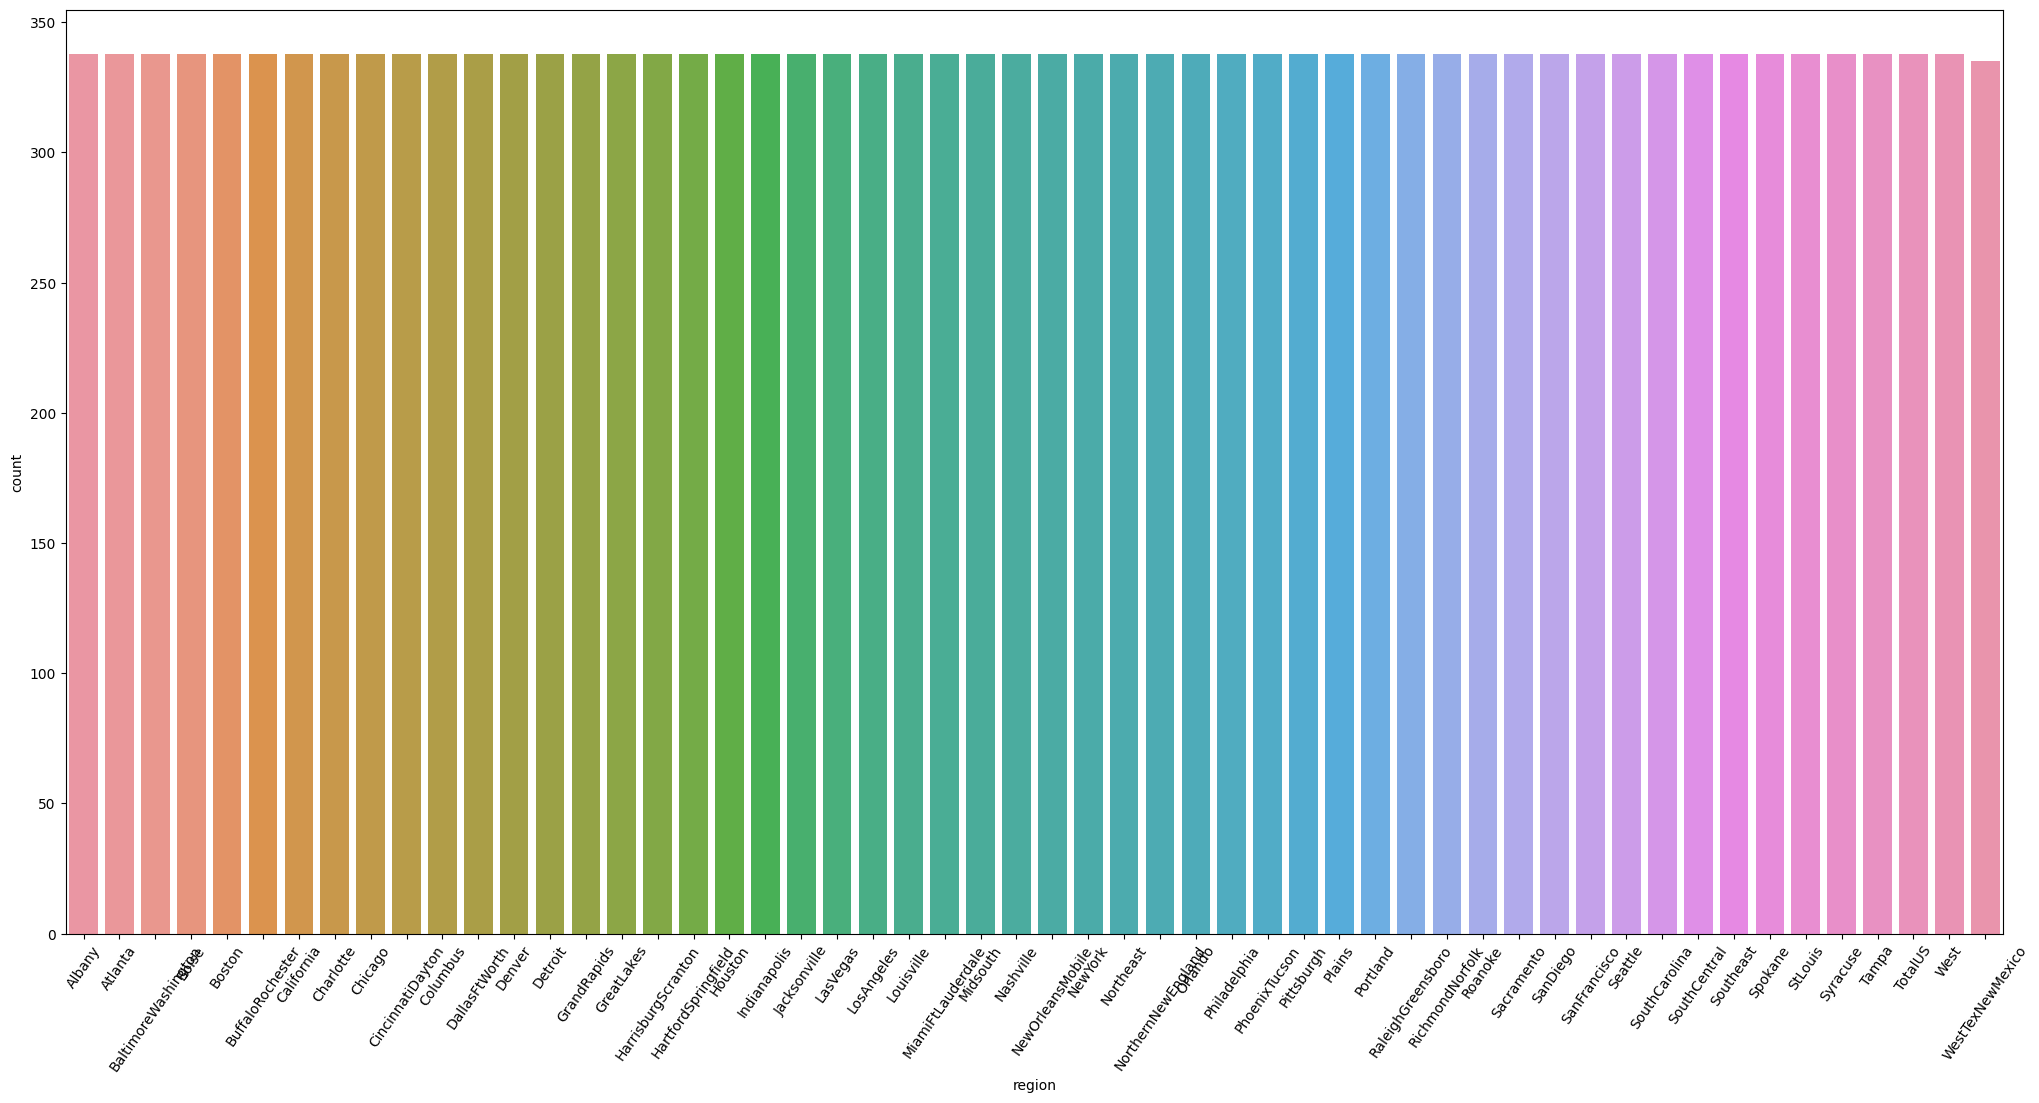

In [ ]:
plt.figure(figsize = [25, 12]) # to inlarging the Graph
sns.countplot(x = 'region', data = avocado_df)
plt.xticks(rotation = 55) # for rotation of X axis names

<Axes: xlabel='year', ylabel='count'>

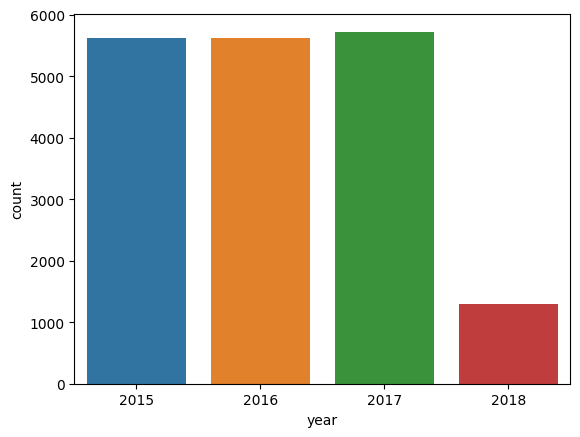

In [ ]:
sns.countplot(x = 'year', data = avocado_df)

In [ ]:
avocado_prophet_df = avocado_df[['Date', 'AveragePrice']]

In [ ]:
avocado_prophet_df

,Date,AveragePrice
0,2015-12-27,1.33
1,2015-12-20,1.35
2,2015-12-13,0.93
3,2015-12-06,1.08
4,2015-11-29,1.28
...,...,...
18244,2018-02-04,1.63
18245,2018-01-28,1.71
18246,2018-01-21,1.87
18247,2018-01-14,1.93


# Training the Data


In [ ]:
avocado_prophet_df = avocado_prophet_df.rename(columns = {'Date' : 'ds', 'AveragePrice': 'y'}) #renaming the columns name

In [ ]:
avocado_prophet_df

,ds,y
0,2015-12-27,1.33
1,2015-12-20,1.35
2,2015-12-13,0.93
3,2015-12-06,1.08
4,2015-11-29,1.28
...,...,...
18244,2018-02-04,1.63
18245,2018-01-28,1.71
18246,2018-01-21,1.87
18247,2018-01-14,1.93


In [ ]:
m = Prophet()

In [ ]:
m.fit(avocado_prophet_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8d5yqbq_/xs871wf9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8d5yqbq_/ol4jbzv5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67103', 'data', 'file=/tmp/tmp8d5yqbq_/xs871wf9.json', 'init=/tmp/tmp8d5yqbq_/ol4jbzv5.json', 'output', 'file=/tmp/tmp8d5yqbq_/prophet_modelyeffh6g6/prophet_model-20230529054202.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:42:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:42:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Forecast the future

In [ ]:
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.498162,0.880533,1.846085,1.498162,1.498162,-0.114302,-0.114302,-0.114302,-0.114302,-0.114302,-0.114302,0.0,0.0,0.0,1.383860
1,2015-01-11,1.493058,0.897993,1.848958,1.493058,1.493058,-0.105889,-0.105889,-0.105889,-0.105889,-0.105889,-0.105889,0.0,0.0,0.0,1.387169
2,2015-01-18,1.487954,0.892824,1.852264,1.487954,1.487954,-0.105634,-0.105634,-0.105634,-0.105634,-0.105634,-0.105634,0.0,0.0,0.0,1.382320
3,2015-01-25,1.482850,0.859681,1.841347,1.482850,1.482850,-0.124689,-0.124689,-0.124689,-0.124689,-0.124689,-0.124689,0.0,0.0,0.0,1.358161
4,2015-02-01,1.477746,0.832270,1.797692,1.477746,1.477746,-0.153133,-0.153133,-0.153133,-0.153133,-0.153133,-0.153133,0.0,0.0,0.0,1.324613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.169593,0.585757,1.608919,0.983894,1.345391,-0.087200,-0.087200,-0.087200,-0.087200,-0.087200,-0.087200,0.0,0.0,0.0,1.082393
530,2019-03-22,1.168878,0.577977,1.597415,0.982771,1.345292,-0.085500,-0.085500,-0.085500,-0.085500,-0.085500,-0.085500,0.0,0.0,0.0,1.083377
531,2019-03-23,1.168162,0.581033,1.587093,0.981648,1.345665,-0.083526,-0.083526,-0.083526,-0.083526,-0.083526,-0.083526,0.0,0.0,0.0,1.084637
532,2019-03-24,1.167447,0.586676,1.621706,0.980324,1.346569,-0.081296,-0.081296,-0.081296,-0.081296,-0.081296,-0.081296,0.0,0.0,0.0,1.086151


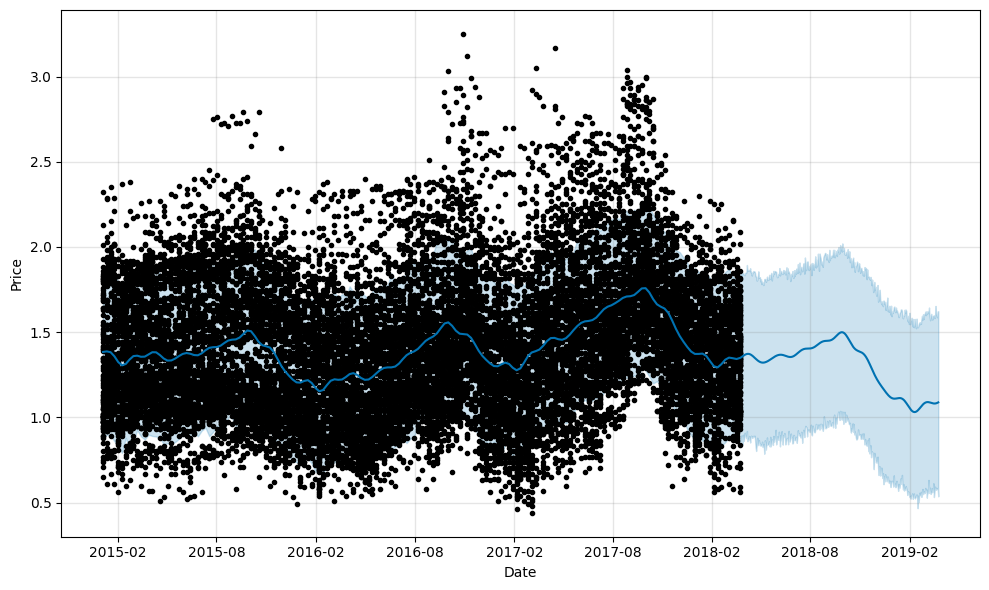

In [ ]:
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'Price')

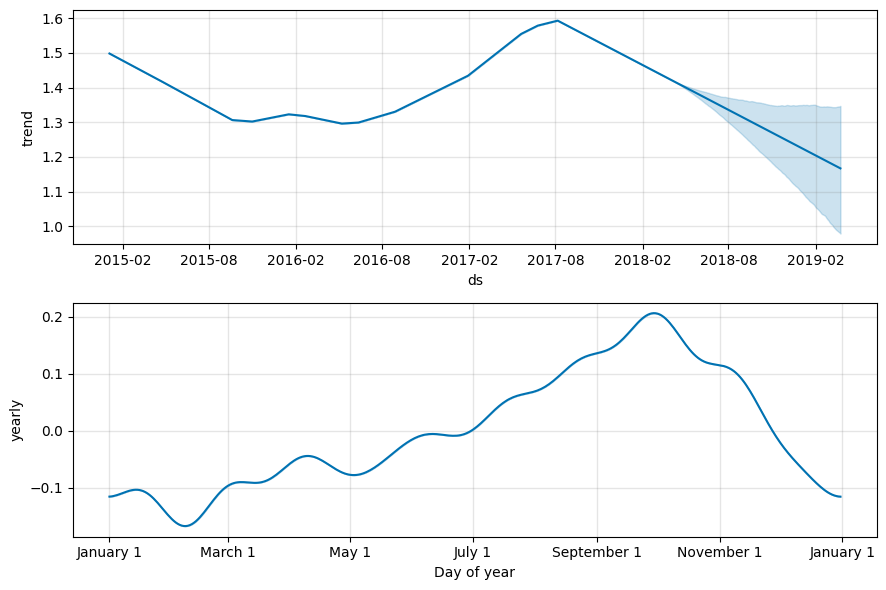

In [ ]:
figure = m.plot_components(forecast)

# Part 2

In [ ]:
avocado_df_sample = avocado_df[avocado_df['region'] == 'Albany'] # where the region is Albany

In [ ]:
avocado_df_sample

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17608,7,2018-02-04,1.52,4124.96,118.38,420.36,0.00,3586.22,3586.22,0.00,0.0,organic,2018,Albany
17609,8,2018-01-28,1.32,6987.56,433.66,374.96,0.00,6178.94,6178.94,0.00,0.0,organic,2018,Albany
17610,9,2018-01-21,1.54,3346.54,14.67,253.01,0.00,3078.86,3078.86,0.00,0.0,organic,2018,Albany
17611,10,2018-01-14,1.47,4140.95,7.30,301.87,0.00,3831.78,3831.78,0.00,0.0,organic,2018,Albany


In [ ]:
avocado_df_sample = avocado_df_sample.sort_values("Date")
avocado_df_sample

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
51,51,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
9177,51,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
50,50,2015-01-11,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany
9176,50,2015-01-11,1.77,1182.56,39.00,305.12,0.00,838.44,838.44,0.00,0.0,organic,2015,Albany
49,49,2015-01-18,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17603,2,2018-03-11,1.68,2570.52,131.67,229.56,0.00,2209.29,2209.29,0.00,0.0,organic,2018,Albany
17602,1,2018-03-18,1.66,3154.45,275.89,297.96,0.00,2580.60,2577.27,3.33,0.0,organic,2018,Albany
8479,1,2018-03-18,1.35,105304.65,13234.86,61037.58,55.00,30977.21,26755.90,3721.31,500.0,conventional,2018,Albany
8478,0,2018-03-25,1.57,149396.50,16361.69,109045.03,65.45,23924.33,19273.80,4270.53,380.0,conventional,2018,Albany


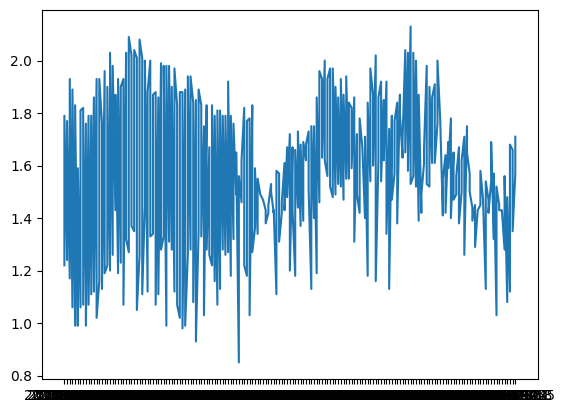

In [ ]:
plt.plot(avocado_df_sample['Date'], avocado_df_sample['AveragePrice'])

In [ ]:
#avocado_df_sample = avocado_df_sample.rename(columns = {'Date' : 'ds', 'AveragePrice': 'y'}) #renaming the columns name

In [ ]:
 p = Prophet()
 p.fit(avocado_df_sample)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8d5yqbq_/pgtr8m7o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8d5yqbq_/cvxwmm5a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21202', 'data', 'file=/tmp/tmp8d5yqbq_/pgtr8m7o.json', 'init=/tmp/tmp8d5yqbq_/cvxwmm5a.json', 'output', 'file=/tmp/tmp8d5yqbq_/prophet_modelzsxiga_6/prophet_model-20230529063721.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:37:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:37:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future1 = m.make_future_dataframe(periods = 365)
forecast1 = m.predict(future)

In [ ]:
forecast1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.498162,0.896237,1.877765,1.498162,1.498162,-0.114302,-0.114302,-0.114302,-0.114302,-0.114302,-0.114302,0.0,0.0,0.0,1.383860
1,2015-01-11,1.493058,0.939134,1.896754,1.493058,1.493058,-0.105889,-0.105889,-0.105889,-0.105889,-0.105889,-0.105889,0.0,0.0,0.0,1.387169
2,2015-01-18,1.487954,0.877923,1.833426,1.487954,1.487954,-0.105634,-0.105634,-0.105634,-0.105634,-0.105634,-0.105634,0.0,0.0,0.0,1.382320
3,2015-01-25,1.482850,0.891903,1.839858,1.482850,1.482850,-0.124689,-0.124689,-0.124689,-0.124689,-0.124689,-0.124689,0.0,0.0,0.0,1.358161
4,2015-02-01,1.477746,0.820773,1.789050,1.477746,1.477746,-0.153133,-0.153133,-0.153133,-0.153133,-0.153133,-0.153133,0.0,0.0,0.0,1.324613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.169593,0.558624,1.634549,0.989640,1.363799,-0.087200,-0.087200,-0.087200,-0.087200,-0.087200,-0.087200,0.0,0.0,0.0,1.082393
530,2019-03-22,1.168878,0.576341,1.625383,0.988095,1.364039,-0.085500,-0.085500,-0.085500,-0.085500,-0.085500,-0.085500,0.0,0.0,0.0,1.083377
531,2019-03-23,1.168162,0.583152,1.634377,0.986558,1.364265,-0.083526,-0.083526,-0.083526,-0.083526,-0.083526,-0.083526,0.0,0.0,0.0,1.084637
532,2019-03-24,1.167447,0.547185,1.627594,0.985068,1.364492,-0.081296,-0.081296,-0.081296,-0.081296,-0.081296,-0.081296,0.0,0.0,0.0,1.086151


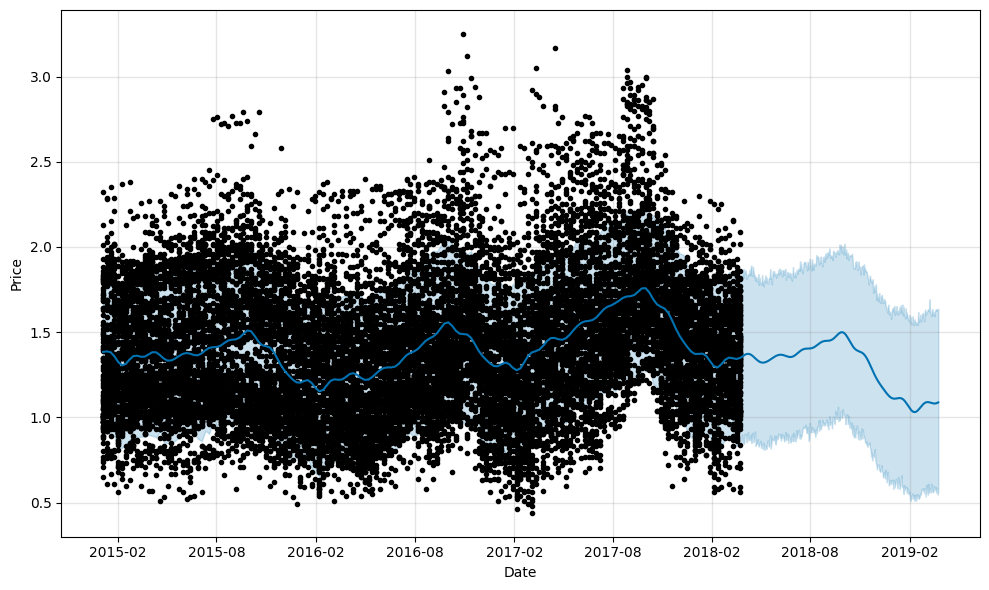

In [ ]:
figure = m.plot(forecast1, xlabel = 'Date', ylabel = 'Price')

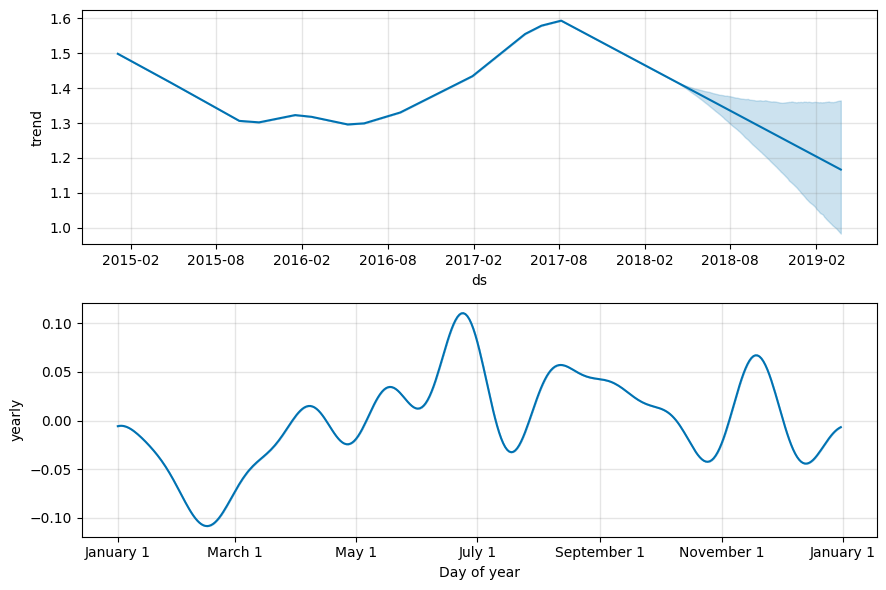

In [ ]:
figure = p.plot_components(forecast1)